In [1]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_us = df[df['job_country']=='United States'].copy()

df_skills_exploded = df_us.explode('job_skills')

df_skills_count = df_skills_exploded.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = df_skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

In [3]:
df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [4]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

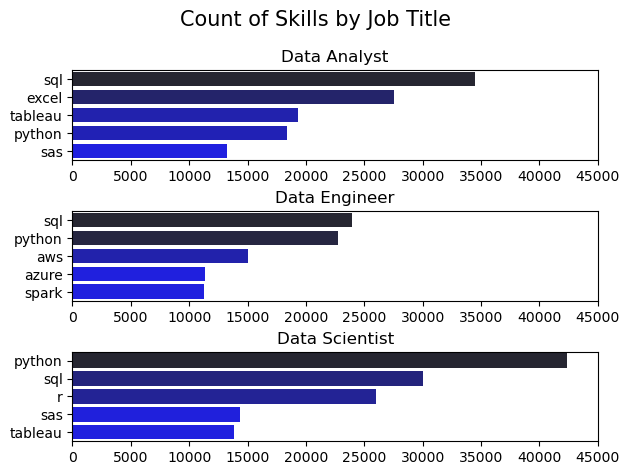

In [5]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)[::-1]
    sns.barplot(data=df_plot, x='skill_count', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r', legend=False)
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].invert_yaxis()
    ax[i].set_xlim(0, 45000)

fig.suptitle('Count of Skills by Job Title', fontsize=15)
fig.tight_layout(h_pad=0.5)
plt.show()

In [6]:
df_job_title_count = df_us['job_title_short'].value_counts().reset_index(name='jobs_total')

df_job_title_count

,job_title_short,jobs_total
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [7]:
df_skills_perc = pd.merge(df_job_title_count, df_skills_count, on='job_title_short', how='left')

df_skills_perc['skill_percent'] = (df_skills_perc['skill_count']/df_skills_perc['jobs_total']*100)

In [8]:
df_skills_perc

,job_title_short,jobs_total,job_skills,skill_count,skill_percent
0,Data Analyst,67816,sql,34452,50.802171
1,Data Analyst,67816,excel,27519,40.578919
2,Data Analyst,67816,tableau,19311,28.475581
3,Data Analyst,67816,python,18382,27.105698
4,Data Analyst,67816,sas,13200,19.464433
...,...,...,...,...,...
1865,Cloud Engineer,423,flask,1,0.236407
1866,Cloud Engineer,423,colocation,1,0.236407
1867,Cloud Engineer,423,php,1,0.236407
1868,Cloud Engineer,423,macos,1,0.236407


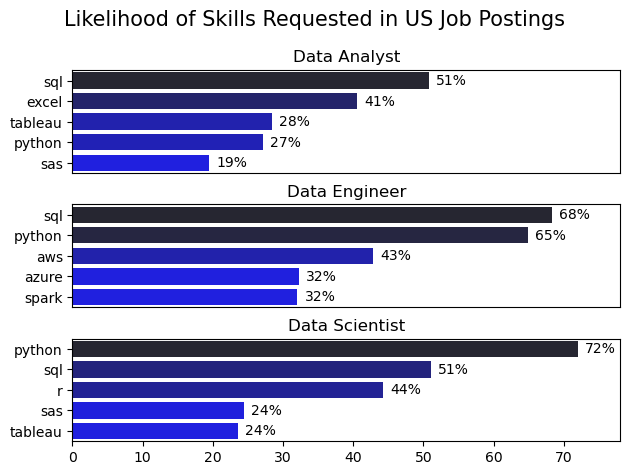

In [9]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_perc_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_perc_plot, x='skill_percent', y='job_skills', ax=ax[i], legend=False, hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_xlim(0, 78)
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

    # label the percentage on the bars
    for n, v in enumerate(df_perc_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

fig.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize=15)
fig.tight_layout(h_pad=.8)
plt.show()

In [21]:
covid_pages = pd.DataFrame({'Category': ['Total Pages'],
                            'viewed_pages': [32],
                            'total_pages': [86],
                             'unviewed_pages': [86 - 32]})
unviewed_pages = covid_pages['total_pages'] - covid_pages['viewed_pages']

plot_data_stacked = pd.DataFrame({
    'Category': ['Total Pages'],
    'Viewed': [covid_pages['viewed_pages']],
    'Unviewed': [unviewed_pages]
})

# Melt the DataFrame to long format, suitable for stacking with hue
plot_data_melted = plot_data_stacked.melt(id_vars='Category', var_name='Page Type', value_name='Count')

plt.figure(figsize=(4, 6))
sns.barplot(
    data=plot_data_melted,
    x='Category', # The single bar
    y='Count',    # The value for height
    hue='Page Type', # The variable to stack
    palette=['mediumseagreen', 'lightgray'],
    dodge=False # Crucial for stacking, prevents side-by-side bars
)
plt.title('COVID-19 Page Views (Stacked)')
plt.xlabel('') # Remove x-label as it's just one category
plt.ylabel('Number of Pages')
plt.ylim(0, covid_pages['total_pages'] * 1.1)
plt.legend(title='Page Status')
plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Figure size 400x600 with 0 Axes>

In [26]:
covid_pages = pd.DataFrame({'Category': ['Total Pages', 'Viewed Pages', 'Unviewed Pages'],
                            'Views': [86, 54, 32]})

In [27]:
covid_pages

,Category,Views
0,Total Pages,86
1,Viewed Pages,54
2,Unviewed Pages,32


In [29]:
viewed_pages = covid_pages[covid_pages['Category']=='Viewed Pages']['Views'].iloc[0]
unviewed_pages = covid_pages[covid_pages['Category']=='Unviewed Pages']['Views'].iloc[0]
total_pages = covid_pages[covid_pages['Category']=='Total Pages']['Views'].iloc[0]

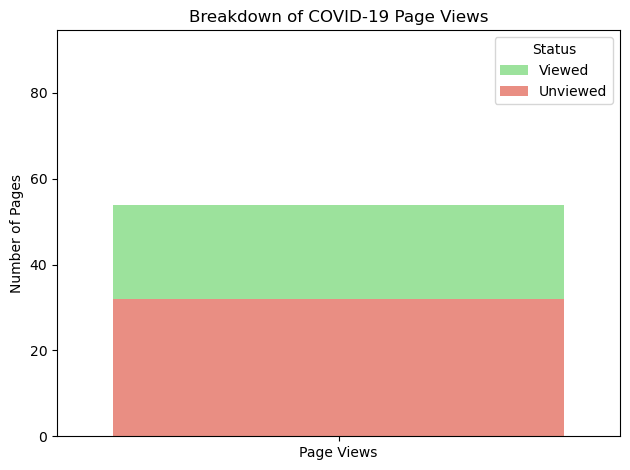

In [37]:
plot_data_for_stacking = pd.DataFrame({
    'Metric': ['Page Views'], # This will be the single bar's label on the x-axis
    'Viewed': [viewed_pages],
    'Unviewed': [unviewed_pages]
})

plot_data_melted = plot_data_for_stacking.melt(
    id_vars='Metric',
    var_name='Page Status', # This will be the hue (what stacks)
    value_name='Count'       # This will be the y-axis values
)

sns.barplot(data=plot_data_melted, dodge=False, x='Metric', y='Count', hue='Page Status', palette=['lightgreen', 'salmon'])


plt.title('Breakdown of COVID-19 Page Views')
plt.xlabel('') # No need for an x-label if there's only one bar category
plt.ylabel('Number of Pages')
plt.ylim(0, total_pages * 1.1) # Set y-limit slightly above total
plt.legend(title='Status')
plt.tight_layout()
plt.show()